In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.patches import Ellipse
from scipy import linalg

#import plotly.express as px
import urllib.request
import zipfile
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

import os
# os.environ["OMP_NUM_THREADS"] = "2"

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error

import pandas as pd
import ast
import numpy as np
from pathlib import Path  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Patch
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter


import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
msa_emissions = pd.read_csv('../../data/tidy/grouped-msa-total.csv') # modeshares (for commuting)
factors = pd.read_csv('../../data/tidy/factors-factoranalysis.csv') # modeshares (for commuting)
factors_df = pd.read_csv('../../data/tidy/raw-data-cleaned.csv')
raw = pd.read_csv('../../data/tidy/raw-data-cluster.csv')

In [3]:
extracted_df = factors_df[['msa', 'Total population']]
extracted_df

,msa,Total population
0,"Abilene, TX",171354
1,"Akron, OH",703286
2,"Albany, GA",147431
3,"Albany-Lebanon, OR",127216
4,"Albany-Schenectady-Troy, NY",880766
...,...,...
350,"Yakima, WA",250649
351,"York-Hanover, PA",447628
352,"Youngstown-Warren-Boardman, OH-PA",538115
353,"Yuba City, CA",173839


In [4]:
last_column_name = factors.columns[-1]

factors[last_column_name] = factors[last_column_name].astype('category')

In [5]:
# Standardize column names for merging
factors.rename(columns={'msa': 'MSA'}, inplace=True)

# Merge data on the 'MSA' column
data = pd.merge(msa_emissions, factors, on='MSA')

In [6]:
data

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5
...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4


In [7]:
# Merge DataFrames on the columns 'msa' and 'MSA'
merged_df = pd.merge(data, extracted_df, left_on='MSA', right_on='msa')

# Drop the duplicate 'MSA' column if needed
merged_df = merged_df.drop(columns=['msa'])

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766
...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839


In [8]:
merged_df['Emissions per capita']=merged_df['carbon dioxide equivalent (Ton)']/merged_df['Total population']
merged_df['carbon dioxide equivalent (MMTCO2e)']=merged_df['carbon dioxide equivalent (Ton)']/1102311.31

In [9]:
merged_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246


In [10]:
new_df = merged_df.copy()
new_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246


In [11]:
new_df['Emissions per capita (MTCO2e)']=new_df['Emissions per capita']*0.91

In [12]:
raw

,msa,Node count,Edge count,Degree average,Edge length total (km),Edge length average (km),Streets per node average,Intersection count,Street length total (km),Street segment count,...,Electric Propulsion (kwh),Electric Battery (kwh),Diesel (miles),Gasoline (miles),Compressed Natural Gas (miles),Other Fuel (miles),Electric Propulsion (miles),Electric Battery (miles),Population density (people/sq km),Cluster
0,"Abilene, TX",14357.0,39401.0,5.488751,17168.965935,0.435749,2.881452,11912.0,8925.436120,20606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.019917,4
1,"Akron, OH",26865.0,70900.0,5.278243,15191.985931,0.214273,2.756896,21200.0,8039.294972,36980.0,...,0.0,0.0,2619706.0,560570.0,3166425.0,0.0,0.0,0.0,294.018910,5
2,"Albany, GA",8466.0,22838.0,5.395228,9545.102272,0.417948,2.837468,6957.0,4989.592979,11954.0,...,0.0,0.0,148053.0,12499.0,439611.0,0.0,0.0,0.0,35.333378,4
3,"Albany-Lebanon, OR",7132.0,17906.0,5.021312,8280.294430,0.462431,2.568144,5101.0,4225.438910,9147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.285743,4
4,"Albany-Schenectady-Troy, NY",36977.0,96867.0,5.239311,27872.441864,0.287739,2.755794,30254.0,14555.424691,50900.0,...,0.0,42126.0,8632669.0,1343264.0,0.0,0.0,0.0,0.0,118.206895,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",10920.0,28902.0,5.293407,14155.026874,0.489759,2.709982,8275.0,7249.500452,14773.0,...,0.0,0.0,730634.0,275527.0,0.0,0.0,0.0,0.0,22.459825,1
351,"York-Hanover, PA",16622.0,44476.0,5.351462,13291.255851,0.298841,2.781194,13507.0,6831.204674,23064.0,...,0.0,0.0,515734.0,6299147.0,553503.0,0.0,0.0,0.0,189.847748,1
352,"Youngstown-Warren-Boardman, OH-PA",24885.0,66650.0,5.356641,19738.540791,0.296152,2.794736,19982.0,10381.621775,34674.0,...,0.0,0.0,1467533.0,486469.0,0.0,0.0,0.0,0.0,119.182102,5
353,"Yuba City, CA",8419.0,21665.0,5.146692,7925.868395,0.365837,2.678465,6360.0,4094.273240,11260.0,...,0.0,0.0,926082.0,0.0,0.0,0.0,0.0,0.0,53.631459,4


In [13]:
# Assume df is your DataFrame
# Step 1: Separate the 'msa' and 'cluster' columns
msa_cluster = raw[['msa', 'Cluster']]
data_to_standardize = raw.drop(columns=['msa', 'Cluster'])

# Step 2: Standardize the remaining columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# Step 3: Create a new DataFrame with the standardized data
standardized_df = pd.DataFrame(standardized_data, columns=data_to_standardize.columns)

# Step 4: Add the 'msa' and 'cluster' columns back
raw = pd.concat([msa_cluster, standardized_df], axis=1)

In [14]:
raw

,msa,Cluster,Node count,Edge count,Degree average,Edge length total (km),Edge length average (km),Streets per node average,Intersection count,Street length total (km),...,Other Fuel (gal/gal equivalent),Electric Propulsion (kwh),Electric Battery (kwh),Diesel (miles),Gasoline (miles),Compressed Natural Gas (miles),Other Fuel (miles),Electric Propulsion (miles),Electric Battery (miles),Population density (people/sq km)
0,"Abilene, TX",4,-0.340119,-0.313531,1.394284,-0.089796,1.204496,1.187439,-0.308795,-0.105106,...,-0.097156,-0.097615,-0.152178,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.707731
1,"Akron, OH",5,-0.073031,-0.045155,0.627727,-0.180780,-0.989995,0.364867,-0.058596,-0.179483,...,-0.097156,-0.097615,-0.152178,-0.067667,-0.205368,0.195232,-0.201659,-0.089999,-0.149891,1.806119
2,"Albany, GA",4,-0.465912,-0.454650,1.053723,-0.440662,1.028113,0.896967,-0.442272,-0.435458,...,-0.097156,-0.097615,-0.152178,-0.229501,-0.315604,-0.127940,-0.201659,-0.089999,-0.149891,-0.602396
3,"Albany-Lebanon, OR",4,-0.494398,-0.496671,-0.307877,-0.498871,1.468872,-0.881657,-0.492269,-0.499597,...,-0.097156,-0.097615,-0.152178,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.733188
4,"Albany-Schenectady-Troy, NY",5,0.142895,0.176087,0.485957,0.402801,-0.262060,0.357593,0.185299,0.367444,...,-0.097156,-0.097615,-0.064929,0.326039,-0.047941,-0.180041,-0.201659,-0.089999,-0.149891,0.169205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1,-0.413511,-0.402984,0.682944,-0.228503,1.739652,0.055046,-0.406768,-0.245774,...,-0.097156,-0.097615,-0.152178,-0.191356,-0.262700,-0.180041,-0.201659,-0.089999,-0.149891,-0.722257
351,"York-Hanover, PA",1,-0.291754,-0.270291,0.894350,-0.268256,-0.152058,0.525332,-0.265829,-0.280884,...,-0.097156,-0.097615,-0.152178,-0.205427,0.948860,-0.114442,-0.201659,-0.089999,-0.149891,0.836224
352,"Youngstown-Warren-Boardman, OH-PA",5,-0.115311,-0.081366,0.913208,0.028462,-0.178701,0.614765,-0.091407,0.017118,...,-0.097156,-0.097615,-0.152178,-0.143107,-0.220272,-0.180041,-0.201659,-0.089999,-0.149891,0.178285
353,"Yuba City, CA",4,-0.466916,-0.464644,0.148688,-0.515182,0.511774,-0.153088,-0.458354,-0.510606,...,-0.097156,-0.097615,-0.152178,-0.178559,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.432031


In [15]:
new_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e),Emissions per capita (MTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724,8.521780
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268,5.224953
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166,6.560072
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529,6.895697
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672,4.563193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870,4.885950
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391,4.242959
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759,5.224640
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246,3.036599


In [1]:
new_df 

NameError: name 'new_df' is not defined

In [ ]:
#using factor score for the prediciton model

import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Assuming 'raw' is your DataFrame and 'new_df' contains your target variables
# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# Keep the cluster information before dropping the columns for encoding
clusters_msa = raw[['msa', 'Cluster']]

# One-hot encode the categorical variables
X = pd.get_dummies(new_df.drop(columns=['MSA', 'Cluster','carbon dioxide equivalent (Ton)', 'Total population', 'Emissions per capita', 'carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']), drop_first=False)
y_emissions = new_df['carbon dioxide equivalent (MMTCO2e)']
y_emissions_per_capita = new_df['Emissions per capita (MTCO2e)']

# Split data into training and testing sets
X_train, X_test, y_train_emissions, y_test_emissions, clusters_msa_train, clusters_msa_test = train_test_split(
    X, y_emissions, clusters_msa, test_size=0.3, random_state=42)
_, _, y_train_emissions_per_capita, y_test_emissions_per_capita = train_test_split(
    X, y_emissions_per_capita, test_size=0.3, random_state=42)

# Add the cluster information back to X_test
X_test['Cluster'] = clusters_msa_test['Cluster'].values

# Determine the size of the training set
print('Training set size:', X_train.shape[0])

# Function to perform grid search without OOB error
def grid_search_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': [4, 6, 8, 10, 12, 14],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'ccp_alpha': [0.0, 0.01, 0.001]
    }
    
    # Initialize the model
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    return best_rf

# Function to calculate metrics
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test.drop(columns=['Cluster']))
    
    metrics = {
        'MSE': [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
        'R-squared': [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)],
        'MAPE': [mean_absolute_percentage_error(y_train, y_train_pred), mean_absolute_percentage_error(y_test, y_test_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))]
    }
    
    return pd.DataFrame(metrics, index=['Train', 'Test']), y_test_pred

# Train model to predict emissions from all MSAs
best_rf_emissions = grid_search_rf(X_train, y_train_emissions)
emissions_metrics, y_pred_emissions = calculate_metrics(best_rf_emissions, X_train, X_test, y_train_emissions, y_test_emissions)

# Train model to predict emissions per capita from all MSAs
best_rf_emissions_per_capita = grid_search_rf(X_train, y_train_emissions_per_capita)
emissions_per_capita_metrics, y_pred_emissions_per_capita = calculate_metrics(best_rf_emissions_per_capita, X_train, X_test, y_train_emissions_per_capita, y_test_emissions_per_capita)


# Add the predicted values back to the test set for visualization
X_test['Predicted Emissions'] = y_pred_emissions
X_test['Predicted Emissions per Capita'] = y_pred_emissions_per_capita



Training set size: 248
Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


In [ ]:
#using the entire raw dataset for the prediction model

import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Assuming 'raw' is your DataFrame and 'new_df' contains your target variables
# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# Keep the cluster information before dropping the columns for encoding
clusters_msa = raw[['msa', 'Cluster']]

# One-hot encode the categorical variables
X = pd.get_dummies(raw.drop(columns=['msa', 'Cluster']), drop_first=False)
y_emissions = new_df['carbon dioxide equivalent (MMTCO2e)']
y_emissions_per_capita = new_df['Emissions per capita (MTCO2e)']

# Split data into training and testing sets
X_train, X_test, y_train_emissions, y_test_emissions, clusters_msa_train, clusters_msa_test = train_test_split(
    X, y_emissions, clusters_msa, test_size=0.3, random_state=42)
_, _, y_train_emissions_per_capita, y_test_emissions_per_capita = train_test_split(
    X, y_emissions_per_capita, test_size=0.3, random_state=42)

# Add the cluster information back to X_test
X_test['Cluster'] = clusters_msa_test['Cluster'].values

# Determine the size of the training set
print('Training set size:', X_train.shape[0])

# Function to perform grid search without OOB error
def grid_search_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': [4, 6, 8, 10, 12, 14],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'ccp_alpha': [0.0, 0.01, 0.001]
    }
    
    # Initialize the model
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    return best_rf

# Function to calculate metrics
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test.drop(columns=['Cluster']))
    
    metrics = {
        'MSE': [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
        'R-squared': [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)],
        'MAPE': [mean_absolute_percentage_error(y_train, y_train_pred), mean_absolute_percentage_error(y_test, y_test_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))]
    }
    
    return pd.DataFrame(metrics, index=['Train', 'Test']), y_test_pred

# Train model to predict emissions from all MSAs
best_rf_emissions = grid_search_rf(X_train, y_train_emissions)
emissions_metrics, y_pred_emissions = calculate_metrics(best_rf_emissions, X_train, X_test, y_train_emissions, y_test_emissions)

# Train model to predict emissions per capita from all MSAs
best_rf_emissions_per_capita = grid_search_rf(X_train, y_train_emissions_per_capita)
emissions_per_capita_metrics, y_pred_emissions_per_capita = calculate_metrics(best_rf_emissions_per_capita, X_train, X_test, y_train_emissions_per_capita, y_test_emissions_per_capita)


# Add the predicted values back to the test set for visualization
X_test['Predicted Emissions'] = y_pred_emissions
X_test['Predicted Emissions per Capita'] = y_pred_emissions_per_capita



In [ ]:
# attach the results to the raw dataframe
raw['Predicted Emissions'] = best_rf_emissions.predict(X)
raw['Predicted Emissions Per Capita'] = best_rf_emissions_per_capita.predict(X)

In [ ]:
emissions_metrics

In [ ]:
emissions_per_capita_metrics

In [ ]:
# Dictionary to rename columns
rename_dict = {
    'Public transportation (excluding taxicab):': 'Public Transportation',
    'Liquefied Petroleum Gas (gal equivalent)': 'LPG Consumption (GGE)',
    'Compressed Natural Gas (gal equivalent)': 'CNG Consumption (GGE)',
    'Bio-Diesel (gal)': 'Bio-Diesel Consumption (gal)',
    'Other Fuel (gal/gal equivalent)': 'Other Fuel Consumption (GGE)',
    'Electric Propulsion (kwh)': 'Electric Propulsion Consumption (kwh)',
    'Electric Battery (kwh)': 'Electric Battery Consumption (kwh)',
    'Diesel (miles)': 'Diesel Mileage (miles)',
    'Gasoline (miles)': 'Gasoline Mileage (miles)',
    'Compressed Natural Gas (miles)': 'CNG Mileage (miles)',
    'Other Fuel (miles)': 'Other Fuel Mileage (miles)',
    'Electric Propulsion (miles)': 'Electric Propulsion Mileage (miles)',
    'Electric Battery (miles)': 'Electric Battery Mileage (miles)',
    'Population density (people/sq km)': 'Population Density (people/sq km)'
}

# Rename columns
X.rename(columns=rename_dict, inplace=True)

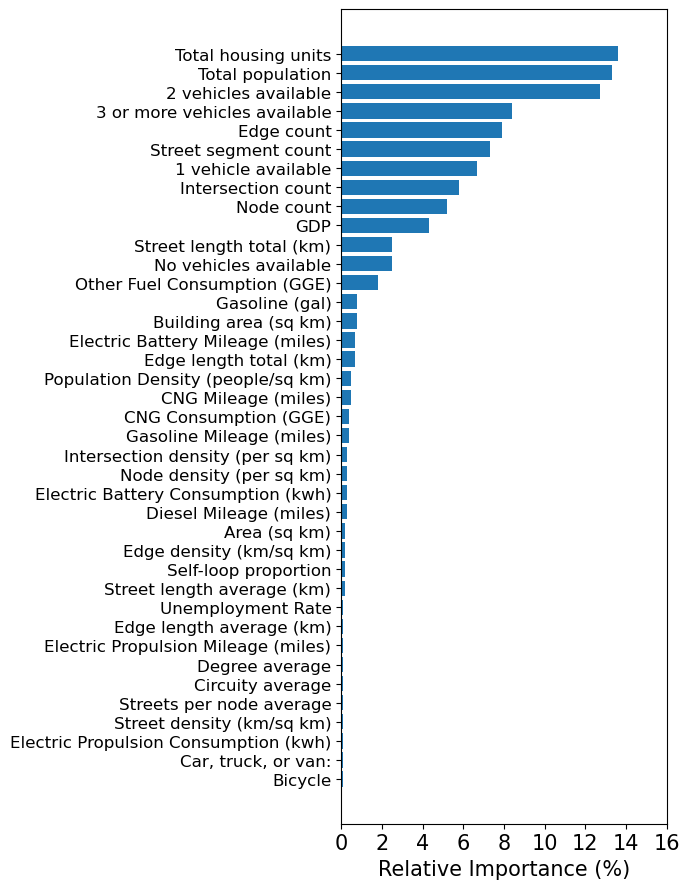

In [22]:
from matplotlib.ticker import MultipleLocator

# Assuming 'best_rf_emissions' and 'X' are already defined in your code
feature_importances_emissions = best_rf_emissions.feature_importances_

feature_importances_emissions = np.round(feature_importances_emissions, 3)

# Create a boolean mask for non-zero importance
non_zero_mask = feature_importances_emissions > 0

# Apply mask to filter out zero importance features
filtered_importances = feature_importances_emissions[non_zero_mask]
filtered_indices = np.where(non_zero_mask)[0]
sorted_indices_emissions = np.argsort(filtered_importances)

# Update feature names and importances based on the filtered data
filtered_feature_names = X.columns[filtered_indices]
sorted_filtered_indices = np.argsort(filtered_importances)

# Plot feature importances for emissions
plt.figure(figsize=(7, 9))  # Adjusted figsize for better readability
plt.barh(range(len(sorted_filtered_indices)), filtered_importances[sorted_filtered_indices]*100, align="center")
plt.yticks(range(len(sorted_filtered_indices)), filtered_feature_names[sorted_filtered_indices], fontsize=12)  # Use yticks for horizontal bars
plt.xticks(fontsize=15)
plt.xlabel("Relative Importance (%)", fontsize=15)  # Add x-axis label

# Set x-axis range
plt.xlim(0, 16)


# Set interval between ticks
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

# Adjust layout to reduce white space
plt.subplots_adjust(left=0.2, right=0.9, top=1, bottom=0.05)

plt.tight_layout()
plt.savefig('../../figures/feature-importance-emissions-without-cluster.jpg', dpi=600)

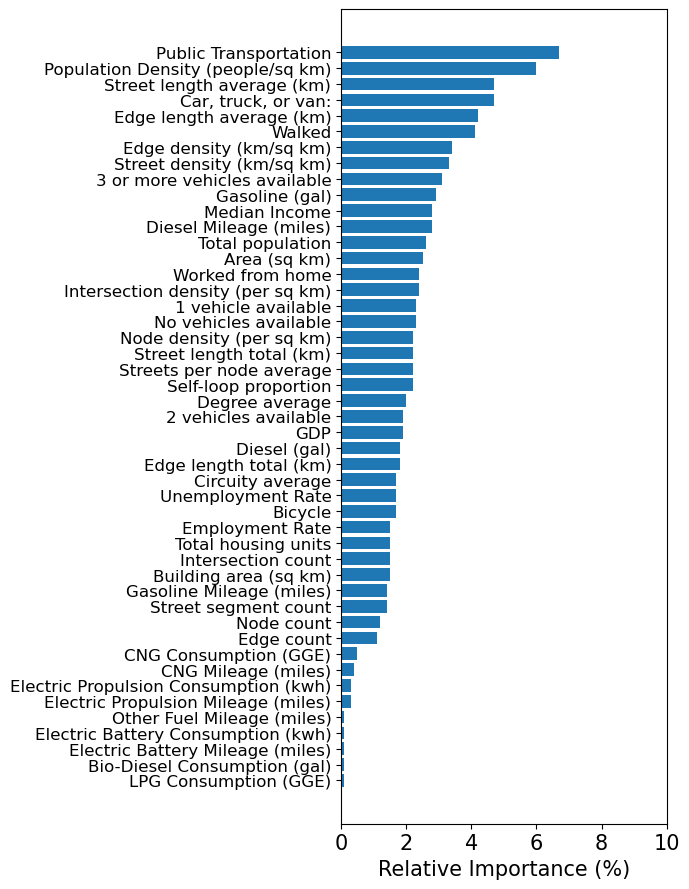

In [23]:
from matplotlib.ticker import MultipleLocator

# Assuming 'best_rf_emissions' and 'X' are already defined in your code
feature_importances_emissions = best_rf_emissions_per_capita.feature_importances_

feature_importances_emissions = np.round(feature_importances_emissions, 3)

# Create a boolean mask for non-zero importance
non_zero_mask = feature_importances_emissions > 0

# Apply mask to filter out zero importance features
filtered_importances = feature_importances_emissions[non_zero_mask]
filtered_indices = np.where(non_zero_mask)[0]
sorted_indices_emissions = np.argsort(filtered_importances)

# Update feature names and importances based on the filtered data
filtered_feature_names = X.columns[filtered_indices]
sorted_filtered_indices = np.argsort(filtered_importances)

# Plot feature importances for emissions
plt.figure(figsize=(7, 9))  # Adjusted figsize for better readability
plt.barh(range(len(sorted_filtered_indices)), filtered_importances[sorted_filtered_indices]*100, align="center")
plt.yticks(range(len(sorted_filtered_indices)), filtered_feature_names[sorted_filtered_indices], fontsize=12)  # Use yticks for horizontal bars
plt.xticks(fontsize=15)
plt.xlabel("Relative Importance (%)", fontsize=15)  # Add x-axis label

# Set x-axis range
plt.xlim(0, 10)


# Set interval between ticks
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

# Adjust layout to reduce white space
plt.subplots_adjust(left=0.2, right=0.9, top=1, bottom=0.05)

plt.tight_layout()
plt.savefig('../../figures/feature-importance-emissions-per-capita-without-cluster.jpg', dpi=600)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11200\2675219745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Predicted Emissions', y='Cluster', data=raw, palette=custom_palette)


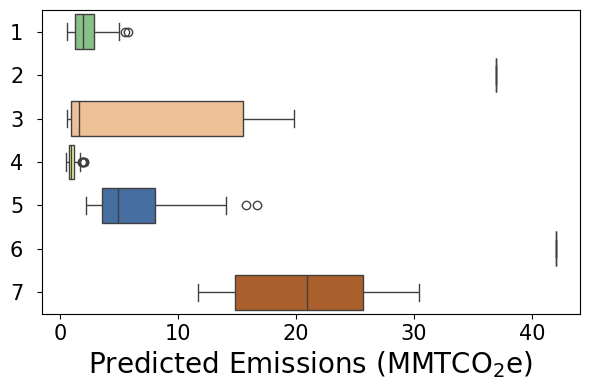

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11200\2675219745.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Predicted Emissions Per Capita', y='Cluster', data=raw, palette=custom_palette)


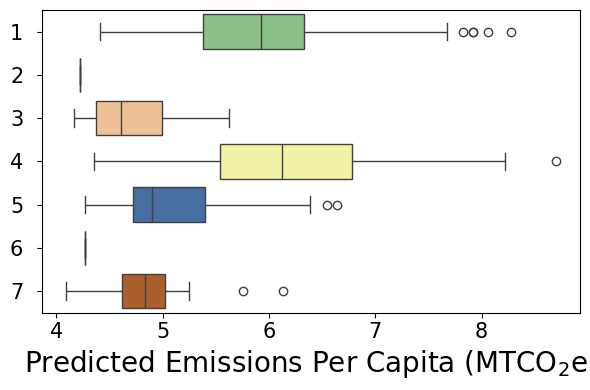

In [24]:
# Define custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Predicted Emissions', y='Cluster', data=raw, palette=custom_palette)
# Customize labels and ticks
plt.xlabel('Predicted Emissions (MMTCO$_2$e)', fontsize=20)
plt.ylabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# Adjust label padding
ax.tick_params(axis='y', pad=10)  # Increase padding if needed
# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('../../figures/cluster--predicted-emissions-boxplot-without-cluster.jpg', dpi=600)
# Show the plot
plt.show()


# Define custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Predicted Emissions Per Capita', y='Cluster', data=raw, palette=custom_palette)
# Customize labels and ticks
plt.xlabel('Predicted Emissions Per Capita (MTCO$_2$e)', fontsize=20)
plt.ylabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# Adjust label padding
ax.tick_params(axis='y', pad=10)  # Increase padding if needed
# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('../../figures/cluster--predicted-emissions-per-capita-boxplot-without-cluster.jpg', dpi=600)
# Show the plot
plt.show()

In [25]:
X_test

,Node count,Edge count,Degree average,Edge length total (km),Edge length average (km),Streets per node average,Intersection count,Street length total (km),Street segment count,Street length average (km),...,Diesel (miles),Gasoline (miles),Compressed Natural Gas (miles),Other Fuel (miles),Electric Propulsion (miles),Electric Battery (miles),Population density (people/sq km),Cluster,Predicted Emissions,Predicted Emissions per Capita
227,8.123131,8.315183,0.064889,6.855376,-1.530256,0.829318,8.420198,6.994729,8.320748,-1.518957,...,15.501058,10.994709,3.393769,7.033870,18.231194,0.513750,6.644789,2,37.000617,4.226479
42,-0.322460,-0.307448,0.648149,-0.404166,-0.559587,0.752523,-0.298613,-0.391021,-0.302671,-0.545299,...,-0.200015,-0.283104,-0.180041,-0.201659,-0.089999,-0.149891,0.083323,1,1.754991,5.791709
256,-0.018238,-0.032631,-0.684290,0.004467,-0.482016,-1.004855,-0.043835,-0.011181,-0.055083,-0.445108,...,-0.150333,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,0.530304,5,3.506502,4.800899
182,-0.531275,-0.524063,1.202476,-0.691751,-0.355072,0.908560,-0.509509,-0.676179,-0.514268,-0.349160,...,-0.220210,-0.266073,-0.162599,-0.201659,-0.089999,-0.149891,0.461776,4,0.751683,5.312335
56,0.292838,0.251115,-1.101297,0.285979,-0.737659,-0.946761,0.235511,0.263608,0.237785,-0.768675,...,-0.038208,-0.150934,-0.180041,-0.201659,-0.089999,-0.149891,0.003116,1,4.452193,5.343196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.389168,-0.387136,-0.015904,-0.289438,1.019762,-0.627469,-0.394377,-0.303833,-0.390597,1.059424,...,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.777269,4,0.801180,7.658169
297,-0.370249,-0.364141,0.231083,-0.147243,1.601324,-0.326230,-0.373473,-0.162561,-0.367564,1.675739,...,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.858123,4,0.978819,7.380079
222,-0.532791,-0.537875,-0.747310,-0.731258,-0.663799,-0.541771,-0.524190,-0.711472,-0.524236,-0.693686,...,-0.138323,-0.227198,-0.141783,-0.201659,-0.089999,-0.149891,-0.300676,1,0.762610,5.159549
350,-0.413511,-0.402984,0.682944,-0.228503,1.739652,0.055046,-0.406768,-0.245774,-0.404294,1.779792,...,-0.191356,-0.262700,-0.180041,-0.201659,-0.089999,-0.149891,-0.722257,1,1.367030,6.867694


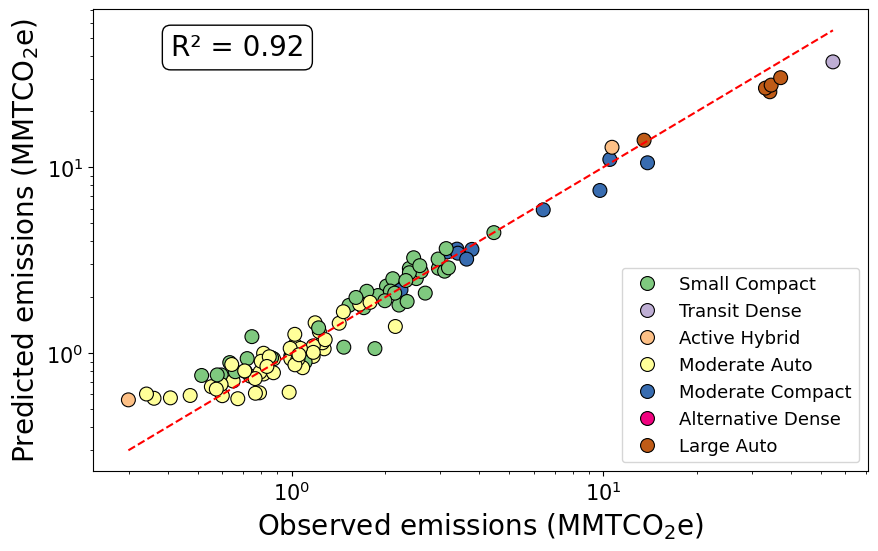

In [26]:
# Ensure the 'Cluster' column is in the test dataset
X_test['Cluster'] = raw.loc[X_test.index, 'Cluster']

# Calculate R-squared
r2 = r2_score(y_test_emissions, y_pred_emissions)

# Create a DataFrame for visualization
vis_df = X_test.copy()
vis_df['Actual Emissions'] = y_test_emissions
vis_df['Predicted Emissions'] = y_pred_emissions

# Define a colormap
cmap = plt.get_cmap('viridis')
unique_clusters = sorted(vis_df['Cluster'].unique())
colors = cmap(np.linspace(0, 1, len(unique_clusters)))

# Define custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)

# Define cluster labels
cluster_labels = [
    'Small Compact', 
    'Transit Dense', 
    'Active Hybrid', 
    'Moderate Auto', 
    'Moderate Compact', 
    'Alternative Dense',
    'Large Auto'
]

# Main Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cluster with different colors
sns.scatterplot(data=vis_df, x='Actual Emissions', y='Predicted Emissions', hue='Cluster', palette=custom_palette, alpha=1, ax=ax, edgecolor='black', s=100)

# Diagonal line
ax.plot([min(y_test_emissions), max(y_test_emissions)], [min(y_test_emissions), max(y_test_emissions)], color='red', linestyle='--')

# Labels and ticks
ax.set_xlabel('Observed emissions (MMTCO$_2$e)', fontsize=20)
ax.set_ylabel('Predicted emissions (MMTCO$_2$e)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Add R-squared annotation
ax.annotate(f'R² = {r2:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=20,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Modify legend labels to include cluster_labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=cluster_labels, loc='lower right', fontsize=13)

# Save and show plot
plt.savefig('../../figures/actual-predicted-emissions-without-cluster.jpg', dpi=600)
plt.show()

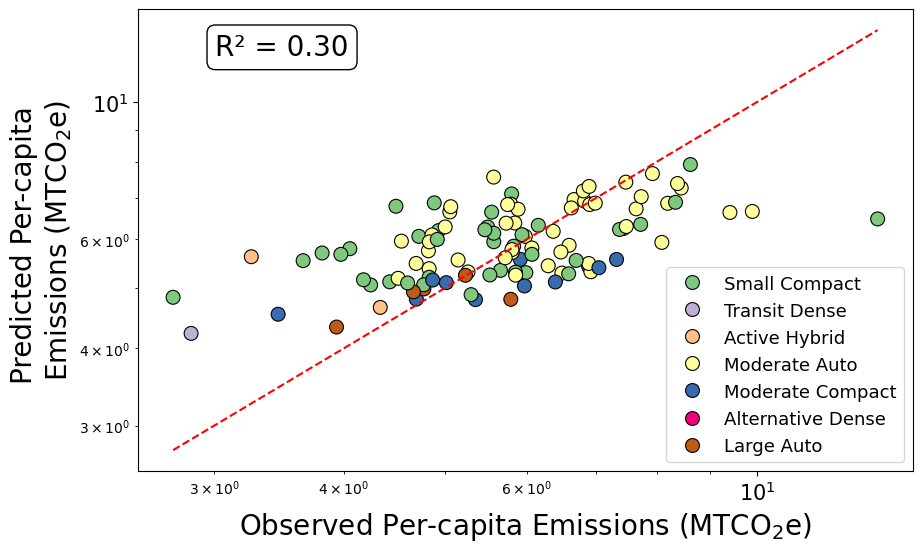

In [27]:
# Ensure the 'Cluster' column is in the test dataset
X_test['Cluster'] = raw.loc[X_test.index, 'Cluster']

# Calculate R-squared
r2 = r2_score(y_test_emissions_per_capita, y_pred_emissions_per_capita)

# Create a DataFrame for visualization
vis_df = X_test.copy()
vis_df['Actual Emissions per Capita'] = y_test_emissions_per_capita
vis_df['Predicted Emissions per Capita'] = y_pred_emissions_per_capita

# Define custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)

# Define cluster labels
cluster_labels = [
    'Small Compact', 
    'Transit Dense', 
    'Active Hybrid', 
    'Moderate Auto', 
    'Moderate Compact', 
    'Alternative Dense',
    'Large Auto'
]

# Main Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cluster with different colors
sns.scatterplot(data=vis_df, x='Actual Emissions per Capita', y='Predicted Emissions per Capita', hue='Cluster', palette=custom_palette, alpha=1, ax=ax, s=100, edgecolor='black')

# Diagonal line
ax.plot([min(y_test_emissions_per_capita), max(y_test_emissions_per_capita)], [min(y_test_emissions_per_capita), max(y_test_emissions_per_capita)], color='red', linestyle='--')

# Labels and ticks
ax.set_xlabel('Observed Per-capita Emissions (MTCO$_2$e)', fontsize=20)
ax.set_ylabel('Predicted Per-capita \nEmissions (MTCO$_2$e)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Add R-squared annotation
ax.annotate(f'R² = {r2:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=20,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Modify legend labels to include cluster_labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=cluster_labels, loc='lower right', fontsize=13)

# Save and show plot
plt.savefig('../../figures/actual-predicted-emissions-per-capita-without-cluster.jpg', dpi=600)
plt.show()

In [28]:
X_test

,Node count,Edge count,Degree average,Edge length total (km),Edge length average (km),Streets per node average,Intersection count,Street length total (km),Street segment count,Street length average (km),...,Diesel (miles),Gasoline (miles),Compressed Natural Gas (miles),Other Fuel (miles),Electric Propulsion (miles),Electric Battery (miles),Population density (people/sq km),Cluster,Predicted Emissions,Predicted Emissions per Capita
227,8.123131,8.315183,0.064889,6.855376,-1.530256,0.829318,8.420198,6.994729,8.320748,-1.518957,...,15.501058,10.994709,3.393769,7.033870,18.231194,0.513750,6.644789,2,37.000617,4.226479
42,-0.322460,-0.307448,0.648149,-0.404166,-0.559587,0.752523,-0.298613,-0.391021,-0.302671,-0.545299,...,-0.200015,-0.283104,-0.180041,-0.201659,-0.089999,-0.149891,0.083323,1,1.754991,5.791709
256,-0.018238,-0.032631,-0.684290,0.004467,-0.482016,-1.004855,-0.043835,-0.011181,-0.055083,-0.445108,...,-0.150333,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,0.530304,5,3.506502,4.800899
182,-0.531275,-0.524063,1.202476,-0.691751,-0.355072,0.908560,-0.509509,-0.676179,-0.514268,-0.349160,...,-0.220210,-0.266073,-0.162599,-0.201659,-0.089999,-0.149891,0.461776,4,0.751683,5.312335
56,0.292838,0.251115,-1.101297,0.285979,-0.737659,-0.946761,0.235511,0.263608,0.237785,-0.768675,...,-0.038208,-0.150934,-0.180041,-0.201659,-0.089999,-0.149891,0.003116,1,4.452193,5.343196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.389168,-0.387136,-0.015904,-0.289438,1.019762,-0.627469,-0.394377,-0.303833,-0.390597,1.059424,...,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.777269,4,0.801180,7.658169
297,-0.370249,-0.364141,0.231083,-0.147243,1.601324,-0.326230,-0.373473,-0.162561,-0.367564,1.675739,...,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.858123,4,0.978819,7.380079
222,-0.532791,-0.537875,-0.747310,-0.731258,-0.663799,-0.541771,-0.524190,-0.711472,-0.524236,-0.693686,...,-0.138323,-0.227198,-0.141783,-0.201659,-0.089999,-0.149891,-0.300676,1,0.762610,5.159549
350,-0.413511,-0.402984,0.682944,-0.228503,1.739652,0.055046,-0.406768,-0.245774,-0.404294,1.779792,...,-0.191356,-0.262700,-0.180041,-0.201659,-0.089999,-0.149891,-0.722257,1,1.367030,6.867694
